In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from util import training, ElmanRNN, JordanRNN, MultiRecurrentNN, convert_feature_into_cyclic
from sklearn.preprocessing import RobustScaler

In [3]:
from util import convert_feature_into_cyclic

def preprocess(data):
    data = data.copy()
    data['Year'] = data['DateTime'].dt.year
    data['Month'] = data['DateTime'].dt.month
    data['Day'] = data['DateTime'].dt.day
    data['DayOfWeek'] = data['DateTime'].dt.dayofweek
    data['WeekOfYear'] = data['DateTime'].dt.isocalendar().week
    data = convert_feature_into_cyclic(data, 'Year', data['Year'].max() - data['Year'].min())
    data = convert_feature_into_cyclic(data, 'Month', 12)
    data = convert_feature_into_cyclic(data, 'Day', 31)
    data = convert_feature_into_cyclic(data, 'DayOfWeek', 7)
    data = convert_feature_into_cyclic(data, 'WeekOfYear', 52)
    # dummies for prop type
    data = pd.get_dummies(data, columns=['propertyType'], drop_first=False, prefix='', prefix_sep='')
    data.drop(columns=['Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'DateTime'], inplace=True)
    return data

raw_data = pd.read_csv('../csvs/properties/raw_sales.csv')
raw_data['DateTime'] = pd.to_datetime(raw_data['datesold'])
raw_data.drop(columns=['datesold'], inplace=True)
raw_data.sort_values(by='DateTime', inplace=True)

print(raw_data.shape)

split_index = int(len(raw_data) * 0.7)
raw_train = raw_data[:split_index]
raw_test = raw_data[split_index:]

preprocessed_train = preprocess(raw_train)
preprocessed_test = preprocess(raw_test)

(29580, 5)


In [11]:
raw_train['propertyType'].describe().to_csv('../csv-descriptions/house-raw-train-description-categorical.csv')

In [14]:
# no exponential
pd.options.display.float_format = '{:.2f}'.format
raw_train.drop(columns='DateTime').describe().round(2).to_csv('../csv-descriptions/house-raw-train-description-numerical.csv')

(20706, 14)
(20706,)
(20643, 64, 14)
(20643,)
Train indices from 0 to 4130 and validation indices from 4131 to 8258
Epoch [1/100], Loss: 308155980582.7879, Validation Loss: 305222378216.7273, Squareroot of Validation Loss: 552469.3460
Epoch [2/100], Loss: 254446495433.6970, Validation Loss: 251550097159.7576, Squareroot of Validation Loss: 501547.7018
Epoch [3/100], Loss: 209114092388.8485, Validation Loss: 207377913669.8182, Squareroot of Validation Loss: 455387.6521
Epoch [4/100], Loss: 172067096265.6970, Validation Loss: 171958553506.9091, Squareroot of Validation Loss: 414678.8559
Epoch [5/100], Loss: 142252522030.5454, Validation Loss: 143761281644.6060, Squareroot of Validation Loss: 379158.6497
Epoch [6/100], Loss: 119272771211.6364, Validation Loss: 121260627781.8182, Squareroot of Validation Loss: 348224.9672
Epoch [7/100], Loss: 102223395622.7879, Validation Loss: 104135139079.7576, Squareroot of Validation Loss: 322699.7662
Epoch [8/100], Loss: 89187722457.2121, Validation L

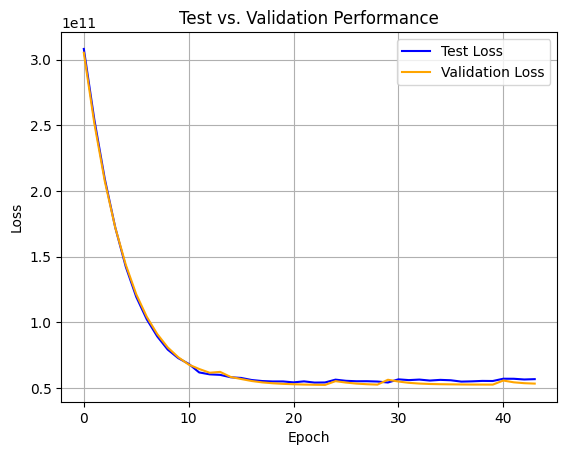

Train indices from 0 to 8258 and validation indices from 8259 to 12386
Epoch [1/100], Loss: 64035550538.8308, Validation Loss: 64522288841.6970, Squareroot of Validation Loss: 254012.3793
Epoch [2/100], Loss: 54055203666.7077, Validation Loss: 59065113444.8485, Squareroot of Validation Loss: 243033.1530
Epoch [3/100], Loss: 53107909647.7538, Validation Loss: 57911532575.0303, Squareroot of Validation Loss: 240648.1510
Epoch [4/100], Loss: 53541091454.0308, Validation Loss: 57650168800.9697, Squareroot of Validation Loss: 240104.4956
Epoch [5/100], Loss: 53553967734.1538, Validation Loss: 57838863887.5152, Squareroot of Validation Loss: 240497.1183
Epoch [6/100], Loss: 53803948221.0462, Validation Loss: 57792392719.5152, Squareroot of Validation Loss: 240400.4840
Epoch [7/100], Loss: 53845474099.2000, Validation Loss: 58002990855.7576, Squareroot of Validation Loss: 240838.1009
Epoch [8/100], Loss: 53455676305.7231, Validation Loss: 58037532796.1212, Squareroot of Validation Loss: 24090

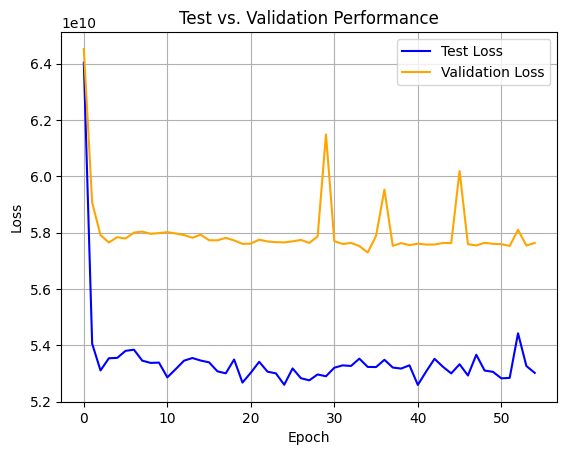

Train indices from 0 to 12386 and validation indices from 12387 to 16514
Epoch [1/100], Loss: 59602949193.8969, Validation Loss: 99619485944.2424, Squareroot of Validation Loss: 315625.5470
Epoch [2/100], Loss: 55856686238.3505, Validation Loss: 90105884485.8182, Squareroot of Validation Loss: 300176.4223
Epoch [3/100], Loss: 56125828127.6701, Validation Loss: 89683075692.6061, Squareroot of Validation Loss: 299471.3270
Epoch [4/100], Loss: 56619386542.1856, Validation Loss: 90545664062.0606, Squareroot of Validation Loss: 300908.0658
Epoch [5/100], Loss: 56093820695.7526, Validation Loss: 89606553600.0000, Squareroot of Validation Loss: 299343.5378
Epoch [6/100], Loss: 55907609103.8351, Validation Loss: 89497932831.0303, Squareroot of Validation Loss: 299162.0511
Epoch [7/100], Loss: 55945506055.9175, Validation Loss: 89539718609.4545, Squareroot of Validation Loss: 299231.8810
Epoch [8/100], Loss: 55521335443.7938, Validation Loss: 89433898015.0303, Squareroot of Validation Loss: 299

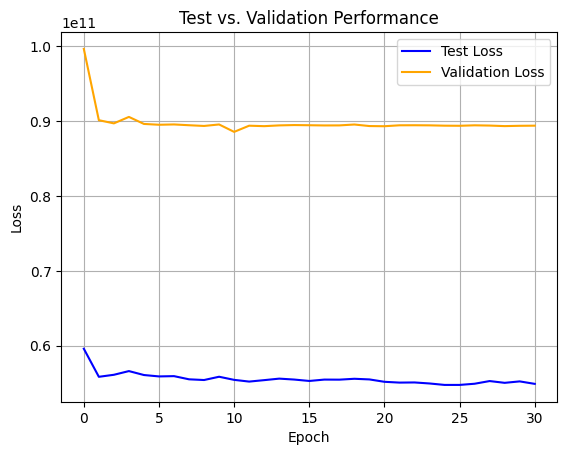

Train indices from 0 to 16514 and validation indices from 16515 to 20642
Epoch [1/100], Loss: 76417804161.9692, Validation Loss: 105762219225.2121, Squareroot of Validation Loss: 325211.0380
Epoch [2/100], Loss: 69274952294.4000, Validation Loss: 105315783711.0303, Squareroot of Validation Loss: 324523.9340
Epoch [3/100], Loss: 69191167511.6308, Validation Loss: 104249056907.6364, Squareroot of Validation Loss: 322876.2254
Epoch [4/100], Loss: 69562255360.0000, Validation Loss: 104114816589.5758, Squareroot of Validation Loss: 322668.2764
Epoch [5/100], Loss: 69703682048.0000, Validation Loss: 109119086529.9394, Squareroot of Validation Loss: 330331.7825
Epoch [6/100], Loss: 71397137423.7538, Validation Loss: 107600016352.9697, Squareroot of Validation Loss: 328024.4143
Epoch [7/100], Loss: 66479552764.0615, Validation Loss: 104833769472.0000, Squareroot of Validation Loss: 323780.4340
Epoch [8/100], Loss: 68013055322.5846, Validation Loss: 101808777278.0606, Squareroot of Validation L

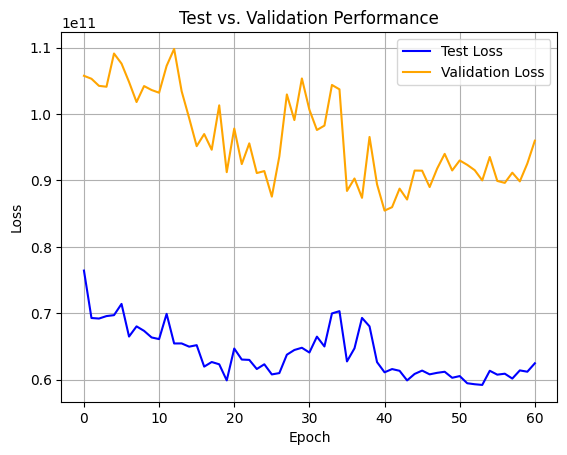

In [ ]:
from util import training, ElmanRNN

from sklearn.preprocessing import RobustScaler

elman_model_h32 = ElmanRNN(input_size=preprocessed_train.shape[1]-1, hidden_size=32, output_size=1, dropout=0.2)

house_elman_h32_results = training(model=elman_model_h32,
                             data=preprocessed_train,
                             batch_size=128,
                             optimizer_learning_rate=50,
                             optimizer_weight_decay=1e-5,
                             target_feature_name='price',
                             model_name='House Elman (hidden size 32)',
                             splits=4,
                             patience=20,
                             scaler_X=RobustScaler(),
                             num_epochs=100)


In [9]:
import pickle
pickle.dump(house_elman_h32_results, open('../pickles/house_elman_h32_results.pkl', 'wb'))

(20706, 14)
(20706,)
(20643, 64, 14)
(20643,)
Train indices from 0 to 4130 and validation indices from 4131 to 8258
Epoch [1/100], Loss: 308594694454.3030, Validation Loss: 308181038173.0909, Squareroot of Validation Loss: 555140.5571
Epoch [2/100], Loss: 263901874610.4243, Validation Loss: 258320144197.8182, Squareroot of Validation Loss: 508252.0479
Epoch [3/100], Loss: 214423542070.3030, Validation Loss: 211011311429.8182, Squareroot of Validation Loss: 459359.6755
Epoch [4/100], Loss: 174668931568.4849, Validation Loss: 173389712290.9091, Squareroot of Validation Loss: 416400.9033
Epoch [5/100], Loss: 143378281316.8485, Validation Loss: 143842340739.8788, Squareroot of Validation Loss: 379265.5280
Epoch [6/100], Loss: 119151168046.5455, Validation Loss: 120625874633.6970, Squareroot of Validation Loss: 347312.3589
Epoch [7/100], Loss: 101302687061.3333, Validation Loss: 102668314810.1818, Squareroot of Validation Loss: 320418.9676
Epoch [8/100], Loss: 87735371713.9394, Validation L

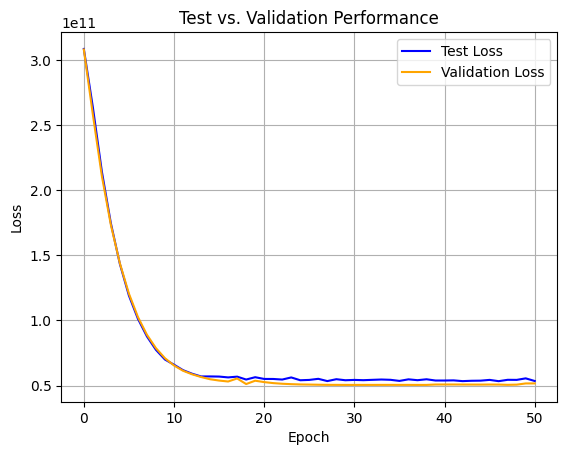

Train indices from 0 to 8258 and validation indices from 8259 to 12386
Epoch [1/100], Loss: 66071846061.2923, Validation Loss: 73399386236.1212, Squareroot of Validation Loss: 270923.2110
Epoch [2/100], Loss: 58753928459.8154, Validation Loss: 62074659933.0909, Squareroot of Validation Loss: 249147.8676
Epoch [3/100], Loss: 56235891727.7538, Validation Loss: 58792387242.6667, Squareroot of Validation Loss: 242471.4153
Epoch [4/100], Loss: 55244918374.4000, Validation Loss: 57675251525.8182, Squareroot of Validation Loss: 240156.7228
Epoch [5/100], Loss: 56136464068.9231, Validation Loss: 64433375232.0000, Squareroot of Validation Loss: 253837.3007
Epoch [6/100], Loss: 56431217805.7846, Validation Loss: 58483097848.2424, Squareroot of Validation Loss: 241832.7890
Epoch [7/100], Loss: 55840549399.6308, Validation Loss: 58298617793.9394, Squareroot of Validation Loss: 241451.0671
Epoch [8/100], Loss: 56020646108.5538, Validation Loss: 58276859779.8788, Squareroot of Validation Loss: 24140

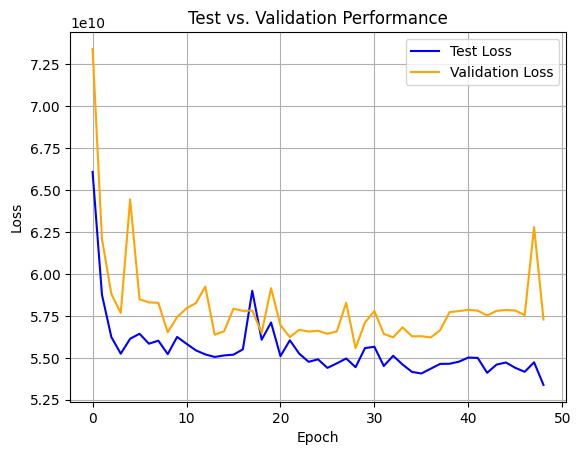

Train indices from 0 to 12386 and validation indices from 12387 to 16514
Epoch [1/100], Loss: 64278687026.1443, Validation Loss: 96468823195.1515, Squareroot of Validation Loss: 310594.3064
Epoch [2/100], Loss: 57623179327.3402, Validation Loss: 90945817506.9091, Squareroot of Validation Loss: 301572.2426
Epoch [3/100], Loss: 58500595838.6804, Validation Loss: 92407090207.0303, Squareroot of Validation Loss: 303985.3454
Epoch [4/100], Loss: 58053410182.5979, Validation Loss: 90297532602.1818, Squareroot of Validation Loss: 300495.4785
Epoch [5/100], Loss: 58881530362.7216, Validation Loss: 90270983633.4545, Squareroot of Validation Loss: 300451.2999
Epoch [6/100], Loss: 57352185834.8866, Validation Loss: 87981917773.5758, Squareroot of Validation Loss: 296617.4603
Epoch [7/100], Loss: 57865582085.2784, Validation Loss: 90116632513.9394, Squareroot of Validation Loss: 300194.3246
Epoch [8/100], Loss: 57370316187.7113, Validation Loss: 90036772057.2121, Squareroot of Validation Loss: 300

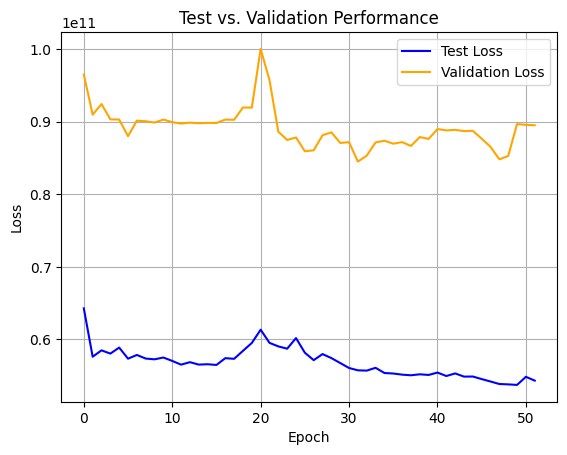

Train indices from 0 to 16514 and validation indices from 16515 to 20642
Epoch [1/100], Loss: 63988521054.5231, Validation Loss: 113459659807.0303, Squareroot of Validation Loss: 336837.7351
Epoch [2/100], Loss: 66949841620.6769, Validation Loss: 111214802013.0909, Squareroot of Validation Loss: 333488.8334
Epoch [3/100], Loss: 65542128372.1846, Validation Loss: 103557006429.0909, Squareroot of Validation Loss: 321802.7446
Epoch [4/100], Loss: 65481186067.6923, Validation Loss: 100115425652.3636, Squareroot of Validation Loss: 316410.2174
Epoch [5/100], Loss: 64952184611.4462, Validation Loss: 103145790743.2727, Squareroot of Validation Loss: 321163.1840
Epoch [6/100], Loss: 66336578260.6769, Validation Loss: 96810650220.6061, Squareroot of Validation Loss: 311144.0988
Epoch [7/100], Loss: 66832920843.8154, Validation Loss: 100522185696.9697, Squareroot of Validation Loss: 317052.3390
Epoch [8/100], Loss: 67420004021.1692, Validation Loss: 93161763374.5455, Squareroot of Validation Los

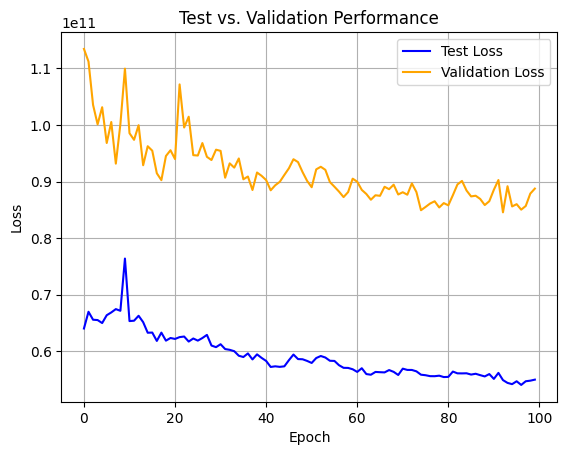

In [6]:
from util import training, ElmanRNN

from sklearn.preprocessing import RobustScaler

elman_model_h32 = ElmanRNN(input_size=preprocessed_train.shape[1]-1, hidden_size=32, output_size=1, dropout=0.3)

house_elman_h32_results_more_dropout_and_decay = training(model=elman_model_h32,
                             data=preprocessed_train,
                             batch_size=128,
                             optimizer_learning_rate=50,
                             optimizer_weight_decay=1e-4,
                             target_feature_name='price',
                             model_name='House Elman (hidden size 32)',
                             splits=4,
                             patience=20,
                             scaler_X=RobustScaler(),
                             num_epochs=100)


(20706, 14)
(20706,)
(20643, 64, 14)
(20643,)
Train indices from 0 to 4130 and validation indices from 4131 to 8258
Epoch [1/100], Loss: 314155892239.5151, Validation Loss: 317463066686.0606, Squareroot of Validation Loss: 563438.6095
Epoch [2/100], Loss: 273294924086.3030, Validation Loss: 267722151749.8182, Squareroot of Validation Loss: 517418.7393
Epoch [3/100], Loss: 222325138649.2121, Validation Loss: 218754146055.7576, Squareroot of Validation Loss: 467711.6056
Epoch [4/100], Loss: 184535830403.8788, Validation Loss: 179783351327.0303, Squareroot of Validation Loss: 424008.6689
Epoch [5/100], Loss: 154066881939.3940, Validation Loss: 153216222673.4546, Squareroot of Validation Loss: 391428.4388
Epoch [6/100], Loss: 133695476829.0909, Validation Loss: 131013283964.1212, Squareroot of Validation Loss: 361957.5720
Epoch [7/100], Loss: 117689176560.4848, Validation Loss: 109209746090.6667, Squareroot of Validation Loss: 330468.9790
Epoch [8/100], Loss: 99233984139.6364, Validation L

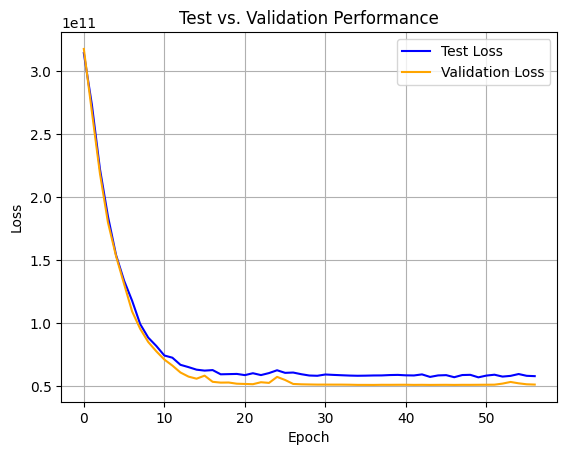

Train indices from 0 to 8258 and validation indices from 8259 to 12386
Epoch [1/100], Loss: 69582424914.7077, Validation Loss: 73846039707.1515, Squareroot of Validation Loss: 271746.2782
Epoch [2/100], Loss: 63137169471.0154, Validation Loss: 57317649563.1515, Squareroot of Validation Loss: 239411.0473
Epoch [3/100], Loss: 61181330573.7846, Validation Loss: 57014574483.3939, Squareroot of Validation Loss: 238777.2487
Epoch [4/100], Loss: 60019508712.3692, Validation Loss: 57044365560.2424, Squareroot of Validation Loss: 238839.6231
Epoch [5/100], Loss: 60954603677.5385, Validation Loss: 58411308559.5152, Squareroot of Validation Loss: 241684.3159
Epoch [6/100], Loss: 59440248233.3538, Validation Loss: 63259861116.1212, Squareroot of Validation Loss: 251515.1310
Epoch [7/100], Loss: 59335976392.8615, Validation Loss: 59173909783.2727, Squareroot of Validation Loss: 243256.8802
Epoch [8/100], Loss: 58824513031.8769, Validation Loss: 65282413474.9091, Squareroot of Validation Loss: 25550

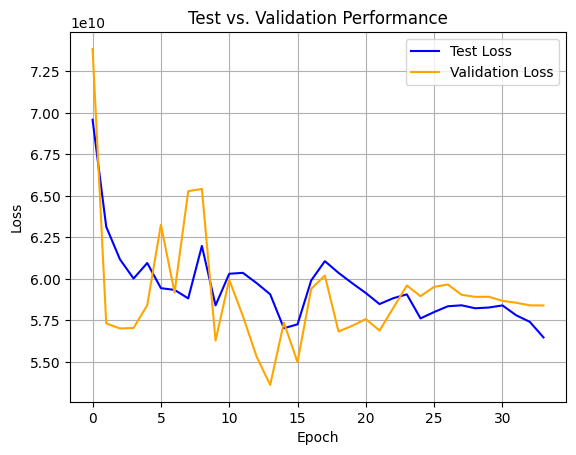

Train indices from 0 to 12386 and validation indices from 12387 to 16514
Epoch [1/100], Loss: 70705562930.1443, Validation Loss: 109502611083.6364, Squareroot of Validation Loss: 330911.7875
Epoch [2/100], Loss: 62448067003.3814, Validation Loss: 98768618651.1515, Squareroot of Validation Loss: 314274.7503
Epoch [3/100], Loss: 63843270128.1649, Validation Loss: 97968025103.5152, Squareroot of Validation Loss: 312998.4427
Epoch [4/100], Loss: 68058032444.7010, Validation Loss: 92116188191.0303, Squareroot of Validation Loss: 303506.4879
Epoch [5/100], Loss: 66177584793.0722, Validation Loss: 93493775204.8485, Squareroot of Validation Loss: 305767.5182
Epoch [6/100], Loss: 64786832711.2577, Validation Loss: 89984317936.4848, Squareroot of Validation Loss: 299973.8621
Epoch [7/100], Loss: 66252845372.7010, Validation Loss: 90712919939.8788, Squareroot of Validation Loss: 301185.8561
Epoch [8/100], Loss: 62398533146.3918, Validation Loss: 84030019584.0000, Squareroot of Validation Loss: 28

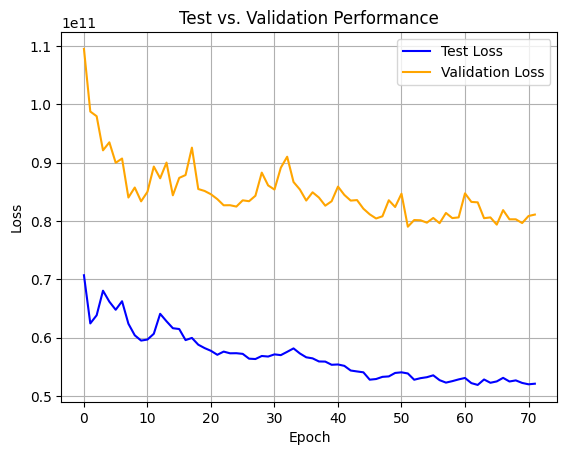

Train indices from 0 to 16514 and validation indices from 16515 to 20642
Epoch [1/100], Loss: 59304043898.0923, Validation Loss: 105942714243.8788, Squareroot of Validation Loss: 325488.4241
Epoch [2/100], Loss: 60487748655.2615, Validation Loss: 93314404538.1818, Squareroot of Validation Loss: 305474.0652
Epoch [3/100], Loss: 60913516323.4462, Validation Loss: 89801272040.7273, Squareroot of Validation Loss: 299668.6037
Epoch [4/100], Loss: 61604530239.0154, Validation Loss: 93579689239.2727, Squareroot of Validation Loss: 305907.9751
Epoch [5/100], Loss: 61855075091.6923, Validation Loss: 91661437983.0303, Squareroot of Validation Loss: 302756.4004
Epoch [6/100], Loss: 62104957054.0308, Validation Loss: 93640684450.9091, Squareroot of Validation Loss: 306007.6542
Epoch [7/100], Loss: 60686369319.3846, Validation Loss: 91425239970.9091, Squareroot of Validation Loss: 302366.0695
Epoch [8/100], Loss: 60967371823.2615, Validation Loss: 90839874032.4848, Squareroot of Validation Loss: 30

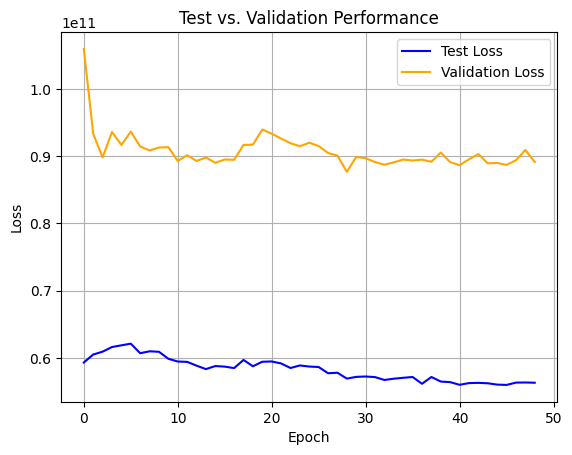

In [7]:
from util import training, ElmanRNN

from sklearn.preprocessing import RobustScaler

elman_model_h32 = ElmanRNN(input_size=preprocessed_train.shape[1]-1, hidden_size=32, output_size=1, dropout=0.5)

house_elman_h32_results_even_more_dropout_and_decay = training(model=elman_model_h32,
                             data=preprocessed_train,
                             batch_size=128,
                             optimizer_learning_rate=50,
                             optimizer_weight_decay=1e-3,
                             target_feature_name='price',
                             model_name='House Elman (hidden size 32)',
                             splits=4,
                             patience=20,
                             scaler_X=RobustScaler(),
                             num_epochs=100)


(20706, 14)
(20706,)
(20643, 64, 14)
(20643,)
Train indices from 0 to 4130 and validation indices from 4131 to 8258
Epoch [1/100], Loss: 305240582826.6667, Validation Loss: 303825652642.9091, Squareroot of Validation Loss: 551203.8213
Epoch [2/100], Loss: 254410057417.6970, Validation Loss: 253558932448.9697, Squareroot of Validation Loss: 503546.3558
Epoch [3/100], Loss: 210914190553.2121, Validation Loss: 211673300992.0000, Squareroot of Validation Loss: 460079.6681
Epoch [4/100], Loss: 175387453626.1818, Validation Loss: 177117373657.2121, Squareroot of Validation Loss: 420853.1498
Epoch [5/100], Loss: 146110162881.9394, Validation Loss: 148842473658.1818, Squareroot of Validation Loss: 385801.0804
Epoch [6/100], Loss: 122844824793.2121, Validation Loss: 126022953642.6667, Squareroot of Validation Loss: 354997.1178
Epoch [7/100], Loss: 104619574737.4545, Validation Loss: 107857368901.8182, Squareroot of Validation Loss: 328416.4565
Epoch [8/100], Loss: 90567048595.3939, Validation L

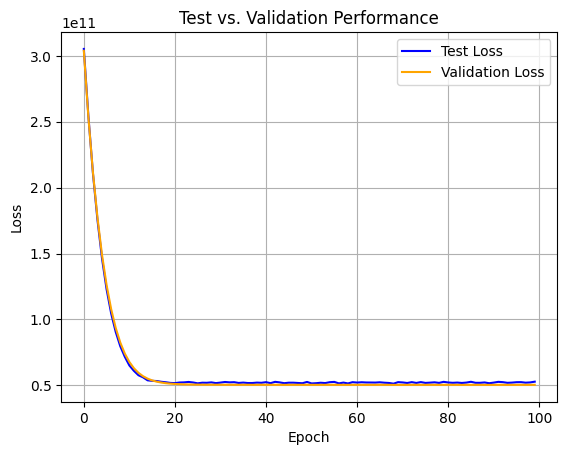

Train indices from 0 to 8258 and validation indices from 8259 to 12386
Epoch [1/100], Loss: 286507640516.9231, Validation Loss: 359934354152.7273, Squareroot of Validation Loss: 599945.2926
Epoch [2/100], Loss: 310469254033.7231, Validation Loss: 351701592250.1818, Squareroot of Validation Loss: 593044.3426
Epoch [3/100], Loss: 283063037888.9846, Validation Loss: 187473825171.3940, Squareroot of Validation Loss: 432982.4767
Epoch [4/100], Loss: 159392709899.8154, Validation Loss: 79610570814.0606, Squareroot of Validation Loss: 282153.4526
Epoch [5/100], Loss: 62694636118.6462, Validation Loss: 68161200810.6667, Squareroot of Validation Loss: 261077.0017
Epoch [6/100], Loss: 61874755710.0308, Validation Loss: 66968207980.6061, Squareroot of Validation Loss: 258782.1632
Epoch [7/100], Loss: 57409989427.2000, Validation Loss: 58526255104.0000, Squareroot of Validation Loss: 241922.0021
Epoch [8/100], Loss: 56304614037.6615, Validation Loss: 57469189213.0909, Squareroot of Validation Loss

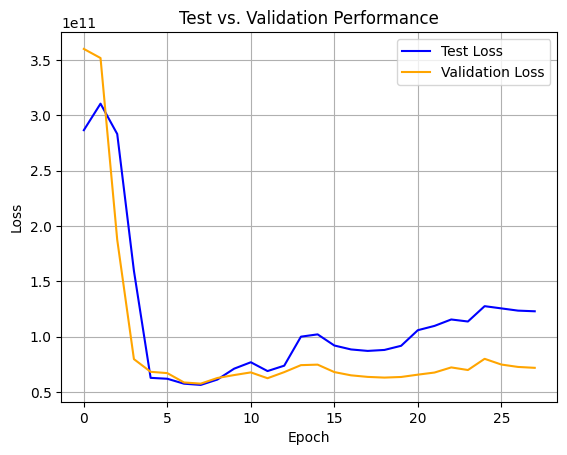

Train indices from 0 to 12386 and validation indices from 12387 to 16514
Epoch [1/100], Loss: 231027634429.3608, Validation Loss: 426241984449.9394, Squareroot of Validation Loss: 652872.1042
Epoch [2/100], Loss: 237687621864.2474, Validation Loss: 251764190859.6364, Squareroot of Validation Loss: 501761.0894
Epoch [3/100], Loss: 106546970032.8247, Validation Loss: 98711284518.7879, Squareroot of Validation Loss: 314183.5204
Epoch [4/100], Loss: 56260888702.6804, Validation Loss: 91422677488.4848, Squareroot of Validation Loss: 302361.8321
Epoch [5/100], Loss: 56533681120.3299, Validation Loss: 89707521427.3939, Squareroot of Validation Loss: 299512.1390
Epoch [6/100], Loss: 55747082514.4742, Validation Loss: 89004961171.3939, Squareroot of Validation Loss: 298336.9926
Epoch [7/100], Loss: 55938603472.4948, Validation Loss: 99241913933.5758, Squareroot of Validation Loss: 315026.8464
Epoch [8/100], Loss: 57446117270.4330, Validation Loss: 93379583689.6970, Squareroot of Validation Loss

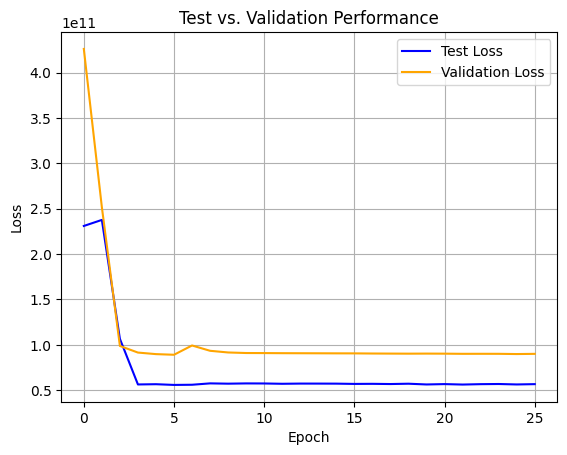

Train indices from 0 to 16514 and validation indices from 16515 to 20642
Epoch [1/100], Loss: 156727081038.7692, Validation Loss: 387675314982.7879, Squareroot of Validation Loss: 622635.7804
Epoch [2/100], Loss: 185646528417.4769, Validation Loss: 153935674647.2727, Squareroot of Validation Loss: 392346.3708
Epoch [3/100], Loss: 86829721600.0000, Validation Loss: 126147431827.3939, Squareroot of Validation Loss: 355172.3973
Epoch [4/100], Loss: 126207743102.0308, Validation Loss: 146007440166.7879, Squareroot of Validation Loss: 382109.1993
Epoch [5/100], Loss: 134931415323.5692, Validation Loss: 189900723044.8485, Squareroot of Validation Loss: 435776.0010
Epoch [6/100], Loss: 153336451198.0308, Validation Loss: 486167606365.0909, Squareroot of Validation Loss: 697257.2024
Epoch [7/100], Loss: 195782908849.2308, Validation Loss: 498562427066.1818, Squareroot of Validation Loss: 706089.5319
Epoch [8/100], Loss: 169631318898.2154, Validation Loss: 485576302592.0000, Squareroot of Valid

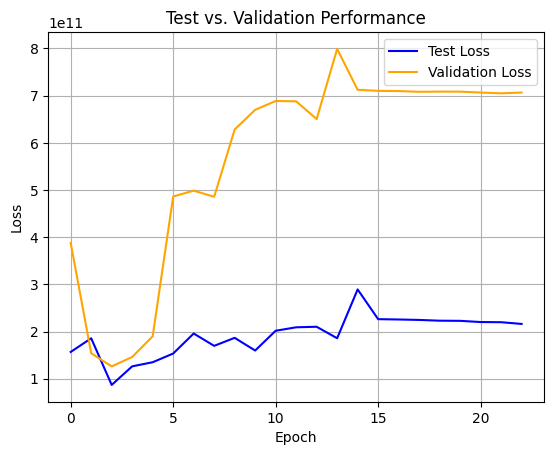

In [10]:
from util import training, ElmanRNN, JordanRNN

from sklearn.preprocessing import RobustScaler

jordan_model_h32 = JordanRNN(input_size=preprocessed_train.shape[1]-1, hidden_size=32, output_size=1, state_size=32, dropout=0.2)

house_jordan_h32_results = training(model=jordan_model_h32,
                             data=preprocessed_train,
                             batch_size=128,
                             optimizer_learning_rate=50,
                             optimizer_weight_decay=1e-5,
                             target_feature_name='price',
                             model_name='House Jordan (hidden size 32)',
                             splits=4,
                             patience=20,
                             scaler_X=RobustScaler(),
                             num_epochs=100)


In [ ]:
pickle.dump(house_jordan_h32_results, open('../pickles/house_jordan_h32_results.pkl', 'wb'))

(20706, 14)
(20706,)
(20643, 64, 14)
(20643,)
Train indices from 0 to 4130 and validation indices from 4131 to 8258
Epoch [1/100], Loss: 321823125131.6364, Validation Loss: 337304207856.4849, Squareroot of Validation Loss: 580778.9664
Epoch [2/100], Loss: 305354822004.3636, Validation Loss: 322224571360.9697, Squareroot of Validation Loss: 567648.2814
Epoch [3/100], Loss: 292397129976.2424, Validation Loss: 310133879901.0909, Squareroot of Validation Loss: 556896.6510
Epoch [4/100], Loss: 281365917323.6364, Validation Loss: 300256903664.4849, Squareroot of Validation Loss: 547957.0272
Epoch [5/100], Loss: 273356662970.1818, Validation Loss: 291268161660.1212, Squareroot of Validation Loss: 539692.6548
Epoch [6/100], Loss: 266053886448.4849, Validation Loss: 283802264296.7273, Squareroot of Validation Loss: 532730.9493
Epoch [7/100], Loss: 261481783792.4849, Validation Loss: 277988279264.9697, Squareroot of Validation Loss: 527245.9381
Epoch [8/100], Loss: 258236752120.2424, Validation 

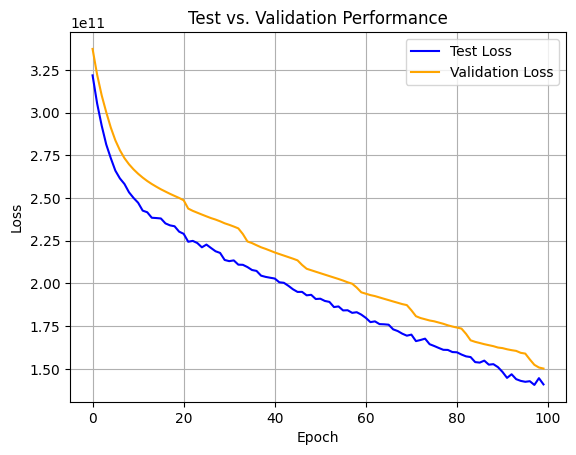

Train indices from 0 to 8258 and validation indices from 8259 to 12386
Epoch [1/100], Loss: 192525905856.9846, Validation Loss: 505948311427.8788, Squareroot of Validation Loss: 711300.4368
Epoch [2/100], Loss: 212888152851.6923, Validation Loss: 334932576193.9394, Squareroot of Validation Loss: 578733.5969
Epoch [3/100], Loss: 209301910575.2615, Validation Loss: 190228056001.9394, Squareroot of Validation Loss: 436151.4141
Epoch [4/100], Loss: 154651633254.4000, Validation Loss: 172388976577.9394, Squareroot of Validation Loss: 415197.5151
Epoch [5/100], Loss: 135764653355.3231, Validation Loss: 167262252187.1515, Squareroot of Validation Loss: 408977.0803
Epoch [6/100], Loss: 129676816131.9385, Validation Loss: 158107851807.0303, Squareroot of Validation Loss: 397627.7805
Epoch [7/100], Loss: 123860356363.8154, Validation Loss: 147627085699.8788, Squareroot of Validation Loss: 384222.7033
Epoch [8/100], Loss: 118032759571.6923, Validation Loss: 152032114750.0606, Squareroot of Valida

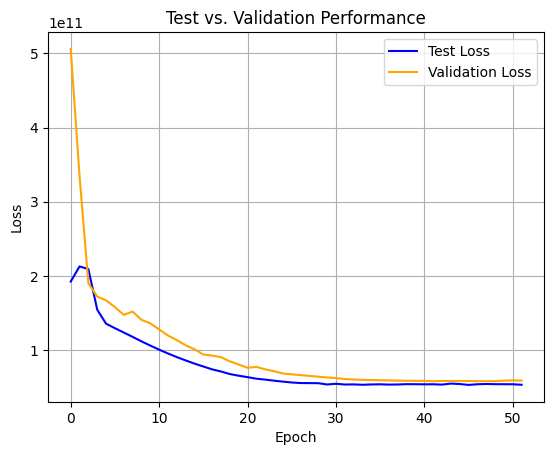

Train indices from 0 to 12386 and validation indices from 12387 to 16514
Epoch [1/100], Loss: 217429916070.2680, Validation Loss: 353926579665.4545, Squareroot of Validation Loss: 594917.2881
Epoch [2/100], Loss: 188620681976.0825, Validation Loss: 220289819865.2121, Squareroot of Validation Loss: 469350.4233
Epoch [3/100], Loss: 100399090487.4227, Validation Loss: 168971938226.4243, Squareroot of Validation Loss: 411061.9640
Epoch [4/100], Loss: 85591993270.1031, Validation Loss: 139241670593.9394, Squareroot of Validation Loss: 373151.0024
Epoch [5/100], Loss: 79775821612.8660, Validation Loss: 131239868229.8182, Squareroot of Validation Loss: 362270.4352
Epoch [6/100], Loss: 75099400149.7732, Validation Loss: 124423421827.8788, Squareroot of Validation Loss: 352737.0435
Epoch [7/100], Loss: 73818739469.1959, Validation Loss: 119616228010.6667, Squareroot of Validation Loss: 345855.7908
Epoch [8/100], Loss: 71456743001.7320, Validation Loss: 115055749926.7879, Squareroot of Validatio

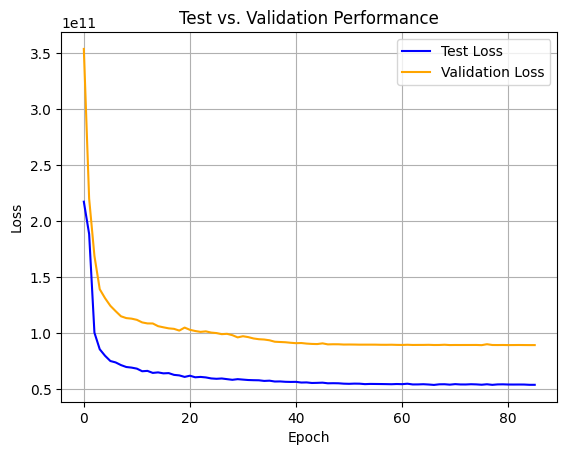

Train indices from 0 to 16514 and validation indices from 16515 to 20642
Epoch [1/100], Loss: 209778850705.7231, Validation Loss: 276536069523.3939, Squareroot of Validation Loss: 525866.9694
Epoch [2/100], Loss: 153289193030.8923, Validation Loss: 154188509308.1212, Squareroot of Validation Loss: 392668.4470
Epoch [3/100], Loss: 79078513238.6461, Validation Loss: 120567545111.2727, Squareroot of Validation Loss: 347228.3760
Epoch [4/100], Loss: 65825906609.2308, Validation Loss: 112738517116.1212, Squareroot of Validation Loss: 335765.5687
Epoch [5/100], Loss: 63847010193.7231, Validation Loss: 108505470417.4545, Squareroot of Validation Loss: 329401.6855
Epoch [6/100], Loss: 63745981424.2462, Validation Loss: 106989072756.3636, Squareroot of Validation Loss: 327091.8415
Epoch [7/100], Loss: 63637395030.6462, Validation Loss: 106446786497.9394, Squareroot of Validation Loss: 326261.8373
Epoch [8/100], Loss: 63888989562.0923, Validation Loss: 106117126019.8788, Squareroot of Validation

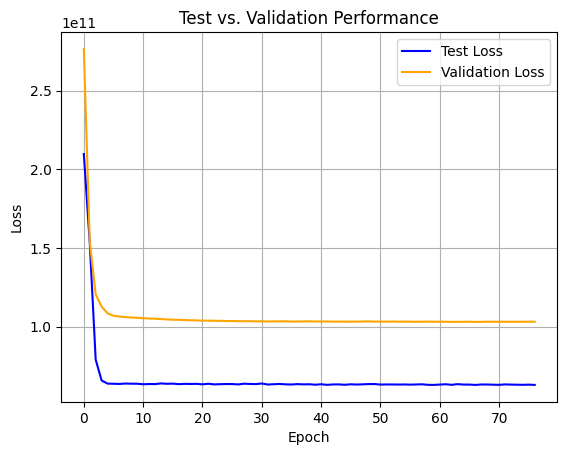

In [5]:
from util import training, MultiRecurrentNN

from sklearn.preprocessing import RobustScaler

multirnn_model_h32 = MultiRecurrentNN(input_size=preprocessed_train.shape[1]-1, hidden_size=32, output_size=1, memory_config=[4,4,4], dropout=0.2)

house_multirnn_h32_results = training(model=multirnn_model_h32,
                             data=preprocessed_train,
                             batch_size=128,
                             optimizer_learning_rate=50,
                             optimizer_weight_decay=1e-5,
                             target_feature_name='price',
                             model_name='House MultiRNN (hidden size 32)',
                             splits=4,
                             patience=10,
                             scaler_X=RobustScaler(),
                             num_epochs=100)


In [ ]:
import pickle
pickle.dump(house_multirnn_h32_results, open('../pickles/house_multirnn_h32_results.pkl', 'wb'))

In [ ]:
house_multirnn_h32_results = pickle.load(open('../pickles/house_multirnn_h32_results.pkl', 'rb'))
house_elman_h32_results = pickle.load(open('../pickles/house_elman_h32_results.pkl', 'rb'))
house_jordan_h32_results = pickle.load(open('../pickles/house_jordan_h32_results.pkl', 'rb'))

/home/christopher/Git/Machine-Learning-Assignment-3/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


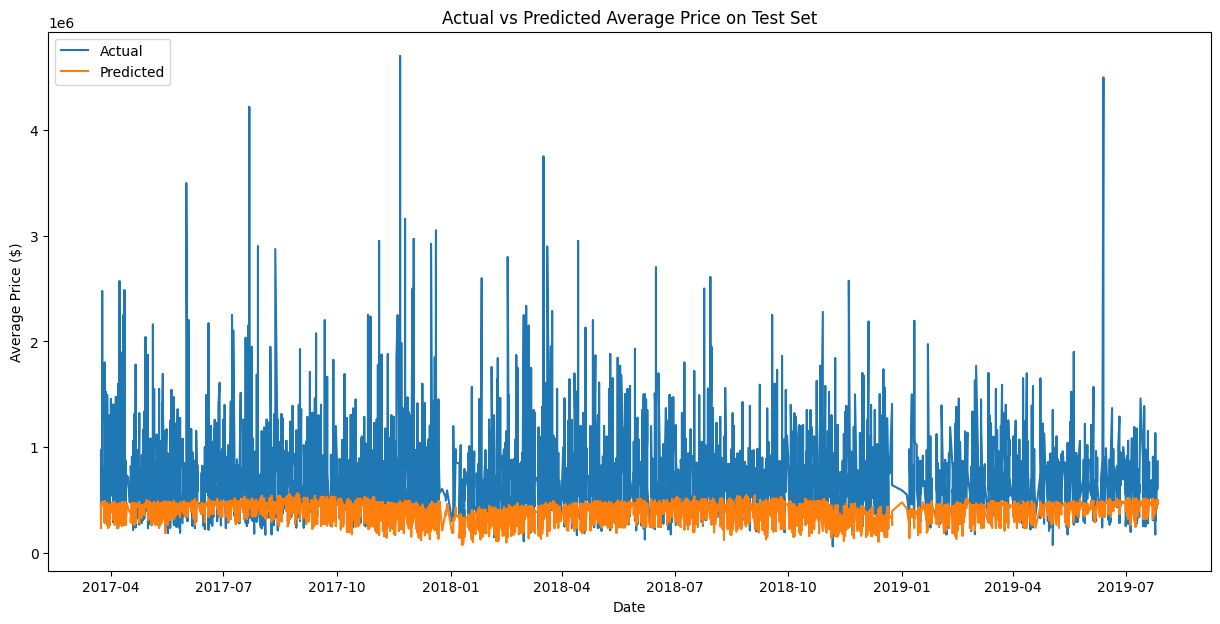

,Mean,Std. Dev.,Min,25%,Median,75%,Max
MultiRNN H32 House,266947.296963,278741.108912,26.65625,94025.117188,195635.539062,345114.367188,4263308.875


In [6]:
from util import get_predictions
processed_test = preprocess(raw_test)
r3 = get_predictions(raw_test=raw_test, 
                     preprocessed_test=processed_test, 
                     results=house_multirnn_h32_results, 
                     model_name='MultiRNN H32 House',
                     xlabel='Date',
                     ylabel='Average Price ($)',
                     title='Actual vs Predicted Average Price on Test Set',
                     target_feature_name='price',
                     save_path='../images/house-multirnn-h32-actual-vs-predicted.pdf',
                     show_plot=True)
r3

/home/christopher/Git/Machine-Learning-Assignment-3/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


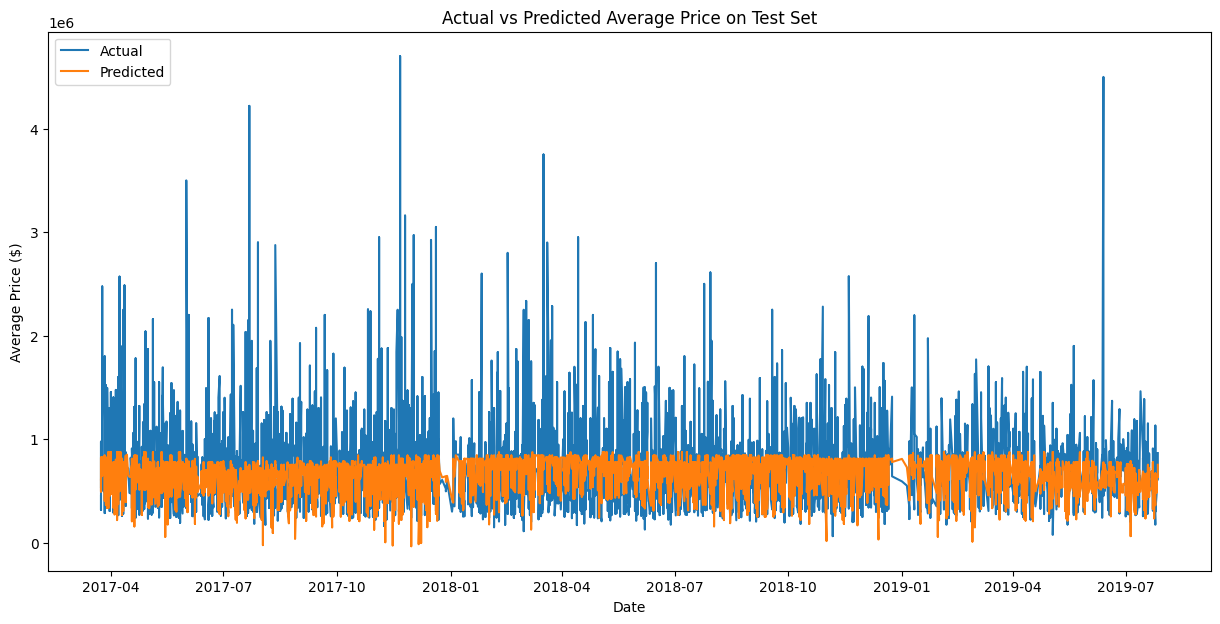

/home/christopher/Git/Machine-Learning-Assignment-3/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


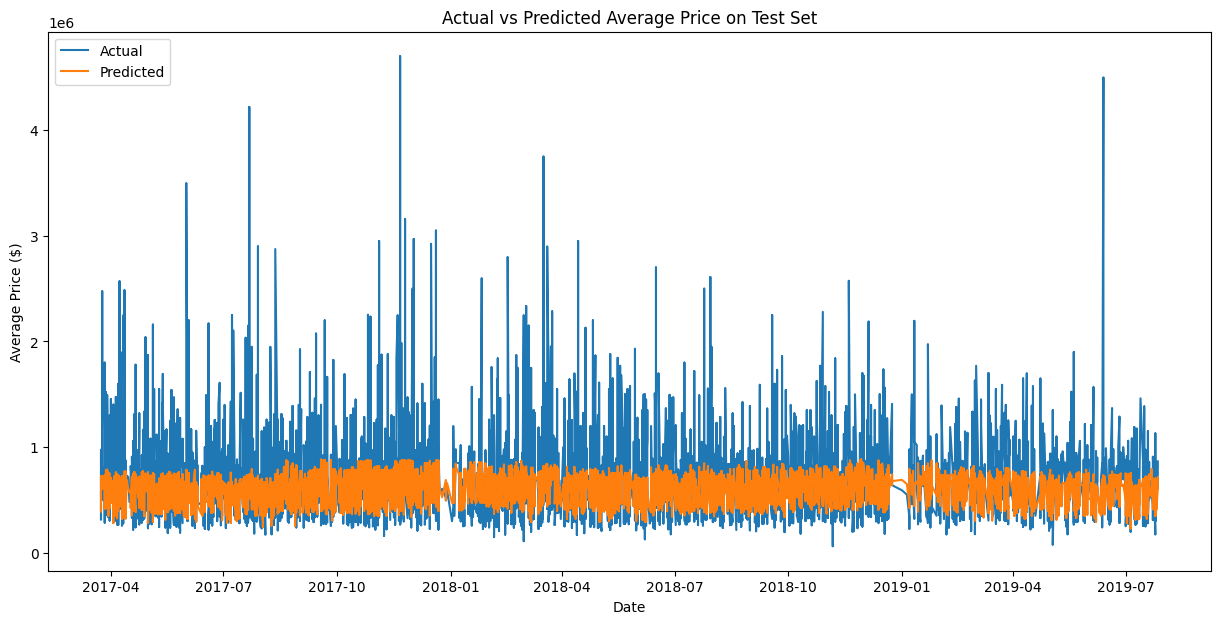

,Mean,Std. Dev.,Min,25%,Median,75%,Max
JordanRNN H32 House,181732.20,212042.46,16.22,62269.17,133358.66,230476.79,3889285.88
ElmanRNN H32 House,153210.22,214216.60,19.88,47342.44,97490.39,173481.61,3923271.12


In [12]:
from util import get_predictions
processed_test = preprocess(raw_test)
r1 = get_predictions(raw_test=raw_test, 
                     preprocessed_test=processed_test, 
                     results=house_jordan_h32_results, 
                     model_name='JordanRNN H32 House',
                     xlabel='Date',
                     ylabel='Average Price ($)',
                     title='Actual vs Predicted Average Price on Test Set',
                     target_feature_name='price',
                     save_path='../images/house-jordan-h32-actual-vs-predicted.pdf',
                     show_plot=True)
r2 = get_predictions(raw_test=raw_test, 
                     preprocessed_test=processed_test, 
                     results=house_elman_h32_results, 
                     model_name='ElmanRNN H32 House',
                     xlabel='Date',
                     ylabel='Average Price ($)',
                     target_feature_name='price',
                     title='Actual vs Predicted Average Price on Test Set',
                     save_path='../images/house-elman-h32-actual-vs-predicted.pdf',
                     show_plot=True)
results = pd.concat([r1, r2])
results.round(2).to_csv('../csv-descriptions/house-rnn-results-raw.csv', index=False)
results.round(2)